<a href="https://colab.research.google.com/github/adolfoguimaraes/datascience/blob/main/code/01_laboratorio_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório de Análise de Dados

Esse laboratório tem como objetivo fazer a caracterização de cada atributo das bases sugeridas, mostrando tipos e escala correspondentes. Em seguida faça uma análise exploratória dos atributos. Inicie com um análise de dados univaridos e em seguida utilize métricas para os dados multivariados. Para cada análise vamos escrever uma conclusão sobre as tarefas realizadas. 

Esse notebook é dividido em 3 partes: 

1. Na primeira parte será mostrado alguns conceitos básicos e métodos para gerar algumas visualizações utilizando as bibliotecas propostas. Para isso, vamos utilizar a base de dados da Iris. Nosso objetivo nessa primeira parte é forcar mais em conhecer a ferramenta do que na análise em si. 

2. Já na segunda parte, vamos aplicar análise completa a base do Titanic. Vamos usar métodos do pandas e mecanismos da visualização para enxergar melhor o conjunto de dados apresentados. 

3. Na terceira parte, vamos usar uma base real para análise e vamos trabalhar de forma colaborativa para obter as respostas da análise.


Vamos lá?

![lets_go](https://media.giphy.com/media/3o7TKUM3IgJBX2as9O/giphy.gif?cid=ecf05e47mtninky8spwobfnp5rt74b7zr4vr5k4cckab9ujz&rid=giphy.gif&ct=g)

In [1]:
# Importação de pacotes necessários para este laboratório

import seaborn as sns # Biblioteca para visualização
import matplotlib.pyplot as plt # Biblioteca de visualização
import pandas as pd # Biblioteca para lidar com a base de dados

## Base de Dados da Iris

Vamos começar com uma tradicional base para estudo em Machine Learning. O dataset [Iris](https://archive.ics.uci.edu/ml/datasets/iris). Esse dataset é bastante utilizado por quem está começando a trabalhar com análise de dados e agrupa algumas informações sobre espécies de plantas.

In [2]:
data_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
data_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Análise Univariada

O primeiro passo é classificar o tipo de cada atributo. Podemos ver que, nesse caso, todos os atributos são quantitativos contínuos representados por números reais. Segundo a descrição da base, eles se referem as medidas de característica de plantas: tamanho das sépalas e pétalas.

A coluna **species** corresponde ao _label_ de cada instância. Cada entrada da base é classificada em uma espécie que pode assumir 3 valores: `Iris-setosa`, `Iris-versicolor` e `Iris-virginica`. A seguir, podemos ver a quantidade de instâncias de cada classe.

In [3]:
values = data_iris['species'].value_counts().to_frame()
values

,species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Um outro método interessante do pandas é o _describe_. Ele permite exibir uma série de informações de uma vez só sobre os atributos.

In [20]:
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Com esse método podemos extrair informações sobre `média`, `desvio padrão` e `valores do quartil`, além do total para cada atributo. O que podemos extrair desses dados? 

* A base é completa. Não existem valores faltando para um ou mais atributos. Observe que cada coluna tem exatamente 150 linhas. 
* Os dados tem pouca variação, quando isso acontece o desvio padrão tende a ser baixo.

Apesar do método _describe_ já trazer um conjunto de informações, podemos extrai-las individualmente ou calcular outras que não são fornecidadas pelo método.

**Cálculo da Média**

In [8]:
# média

data_iris[["sepal_length","sepal_width","petal_length","petal_width"]].mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

**Cálculo da Mediana**

In [11]:
# média

data_iris[["sepal_length","sepal_width","petal_length","petal_width"]].median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

Estas métricas calculadas são sensíveis a *outliers* na base. No entanto, analisando somente esse números fica difícil ver se tem algum _outlier_ já que os valores estão muito próximos. Podemos enxergar melhor essas informações utilizando um `boxplot` para cada um dos atributos. Vamos utilizar a biblioteca do `seaborn` para visualizar essa informação. 

<AxesSubplot:>

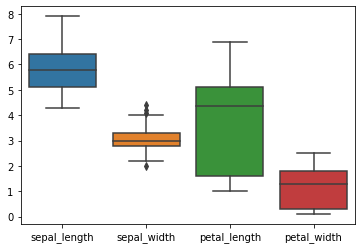

In [9]:
sns.boxplot(data=data_iris)

Os pontos que aparecem no gráfico do `sepal_width` são os outliers identificados neste atributo. Isso indica que esses valores fogem um pouco da média dos valores para este atributo. O que fazer com esses dados será discutido mais a frente.

O gráfico anterior mostrou os valores para toda a base. Podemo mostrá-los por espécie.

<AxesSubplot:xlabel='species', ylabel='petal_width'>

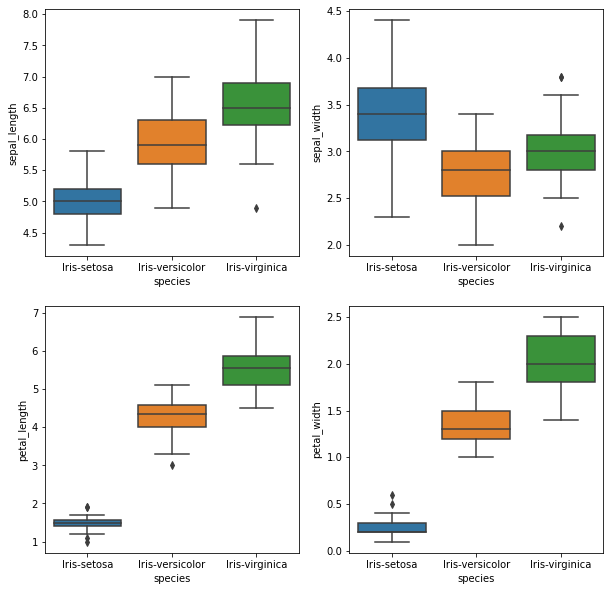

In [10]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.boxplot(data=data_iris, x="species", y="sepal_length", ax=axs[0][0])
sns.boxplot(data=data_iris, x="species", y="sepal_width", ax=axs[0][1])
sns.boxplot(data=data_iris, x="species", y="petal_length", ax=axs[1][0])
sns.boxplot(data=data_iris, x="species", y="petal_width", ax=axs[1][1])

Vamos calcular algumas métricas de espalhamento (ou dispersão).

**Cálculo do Intervalo**

In [5]:
# intervalo

data_features = data_iris[["sepal_length","sepal_width","petal_length","petal_width"]]
data_features.max() - data_features.min()

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

**Cálculo da Variância**

In [18]:
# Variância

data_iris[["sepal_length","sepal_width","petal_length","petal_width"]].var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

**Cálculo do Desvio Padrão**

In [7]:
# desvio padrão

data_iris[["sepal_length","sepal_width","petal_length","petal_width"]].std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

**Cálculo do coeficiente de variação**

In [19]:
# coeficiente de variação

data_ = data_iris[["sepal_length","sepal_width","petal_length","petal_width"]]

(100 * data_.std()) / data_.mean()

sepal_length    14.171126
sepal_width     14.197587
petal_length    46.942721
petal_width     63.667470
dtype: float64

Vamos calcular algumas métricas que nos permite ver a distribuição dos valores de cada atributo.

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

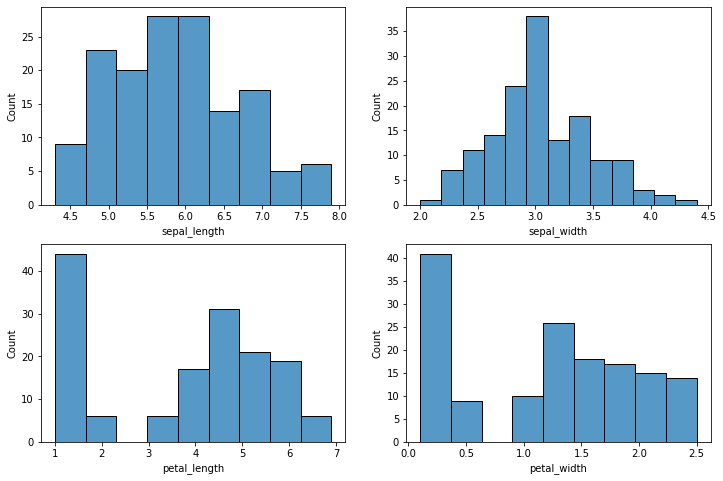

In [37]:
fig, axs  = plt.subplots(ncols=2,nrows=2,figsize=(12,8))
sns.histplot(data_iris['sepal_length'], ax=axs[0][0])
sns.histplot(data_iris['sepal_width'], ax=axs[0][1])
sns.histplot(data_iris['petal_length'], ax=axs[1][0])
sns.histplot(data_iris['petal_width'], ax=axs[1][1])

A visualização do histograma permite enxergar como os dados estão distribuídos. Como os valores que estamos trabalhando são todos contínuos, o eixo x do histograma são intervalo de valores e o eixo y a quantidade de instâncias que estão naquele intervalo. As informações sobre a distribuição dos dados também pode ser calculado a partir das métricas `obliquidade` e `curtose`. A primeira permite ver se a distribuição é simétrica (se aproxima da distribuição normal), se concentra mais a esquerda ou a direita. Já a segunda, permite verificar o achatamento da distribuição. Vamos calcular tais métricas. 

In [32]:
data_ = data_iris[["sepal_length","sepal_width","petal_length","petal_width"]]

**Cálculo da Obliquidade**

In [72]:
data_.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

**Cálculo da curtose**

In [34]:
data_.kurtosis()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

Observe que os valores condizem com o que foi visto no histograma. 

## Análise Multivariada

A outra análise que podemos fazer é em relação aos dados multivariados. A informação que mais interessa por enquanto é a relação de correlação. Vamos exibir a matriz de correlação e o gráfico _scatter plot_ dos atributos.

In [38]:
# Tabela de Correlação

corr_table = data_iris.corr()
corr_table

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Podemos visualizar isso melhor com o um Heatmap.

<AxesSubplot:>

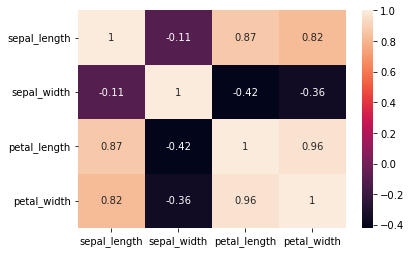

In [39]:
# Heatmap

sns.heatmap(corr_table, xticklabels=corr_table.columns, yticklabels=corr_table.columns, annot=True)

Outra forma de enxergar com os dados se comportam é a partir de um `Scatter Plot` que permite ver a distribuição dos dados.

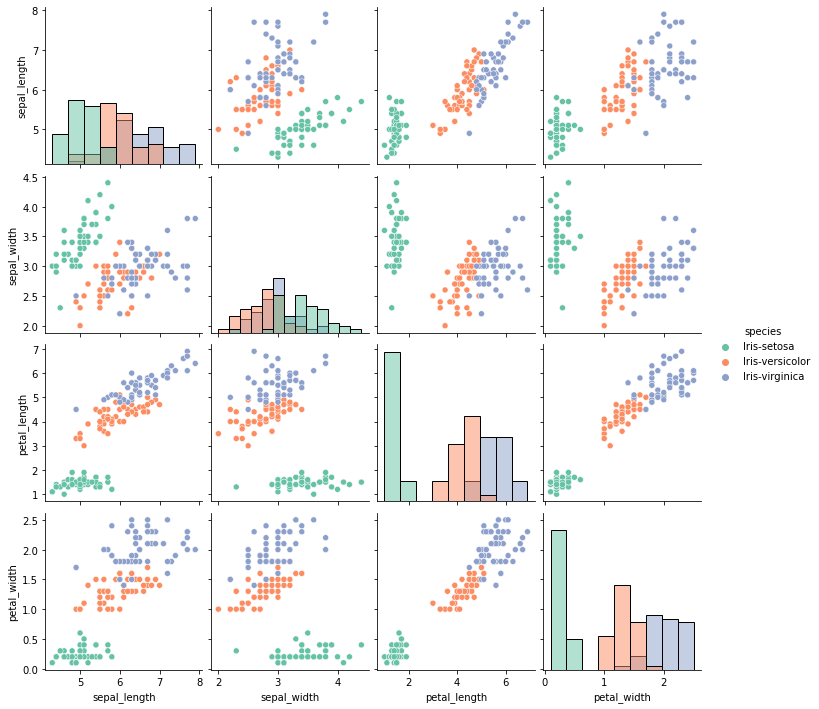

In [40]:
# Scatter Plot

sns.pairplot(data_iris, kind="scatter", hue="species", markers=["o", "o","o"], palette="Set2",diag_kind="hist")
plt.show()

Vamos analisar duas correlações para reforçar o significado desses valores. Primeiro vamos comentar sobre uma correlação positiva, no caso a correlação entre *petal_length* e *petal_width* com coeficiente de correlação igual a 0.96 e a correlação entre *sepal_width*  e *petal_length* que possuem um coeficiente negativo de de -0.43. Se plotarmos somente o gráfico do primeiro caso temos:

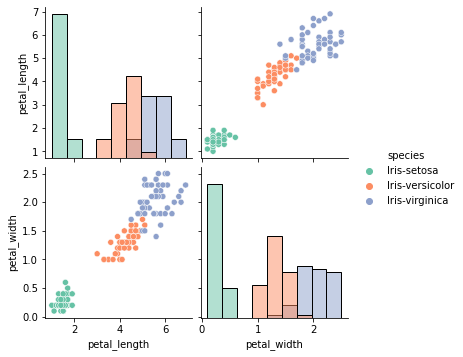

In [41]:
sns.pairplot(data_iris[['petal_length','petal_width','species']], kind="scatter", hue="species", markers=["o", "o","o"], palette="Set2",diag_kind="hist")
plt.show()

Observe que claramente existe uma relação linear positva entre os dois atributos. É fácil traçar uma reta que consiga casar com estes dados (ou com boa parte deles) e o comportamento da reta indica que o aumento de um influencia no aumento do outro. 

No entanto, se analisarmos o caso negativo, temos: 

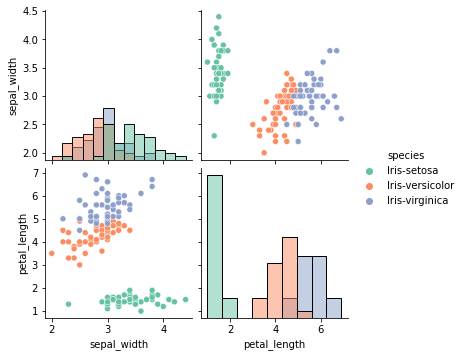

In [42]:
sns.pairplot(data_iris[['sepal_width','petal_length','species']], kind="scatter", hue="species", markers=["o", "o","o"], palette="Set2",diag_kind="hist")
plt.show()

Já neste caso, a relação é negativa. Ou seja, o aumento de um implica na redução de outro. Observe que é bem influenciado por conta dos dados marcados de verde (classe _setosa_).

## Base da Dados do Titanic

Vamos praticar alguns dos conceitos vistos até aqui. Para isso, vamos trabalhar com a base de sobreviventes do Titanic. Originalmente, esse base pode ser acessada a partir do Kaggle no endereço https://www.kaggle.com/c/titanic/.

![yesss](https://media.giphy.com/media/Uj3SeuVfg2oCs/giphy.gif)

Um passo importante antes de trabalhar com qualquer base é identificar o que significa cada coluna da base. Essas informações devem ser adquiridas por quem forneceu a base de dados ou o especialista da área que se está trabalhando. Neste caso, as informações foram retiradas do próprio site do Kaggle.

| Atributo | Definição | Chave dos valores |
|:--------|:--------:|:--------:|
| Survived | Se sobreviveu ou não ao titanic | 0 = Não e 1 = Sim |
| Pclass | Classe do ticket | 1 = primeira, 2 = segunda e 3 = terceira |
| Sex | Sexo do passageiro | |
| Age | Idade em anos | |
| SibSp | Número de irmãos / cônjuges a bordo | |
| Parch | Número de pais / filhos a bordo | |
| Ticket | Número do ticket | | 
| Fare | Valor da passagem | | 
| Cabin | Número da cabine | |
| Embarked | Portão de embarque | C = Cherboug, Q - Queenstown, S = Southampton | 

Vamos carregar a base em um DataFrame para começar os trabalhos.


In [45]:
# Carregand o a base de dados
titanic_dataset = pd.read_csv("../datasets/TitanicDataset.csv")
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Descrição das Tarefas

1. Classificar cada um dos atributos em relação à tipo e escala vistos em sala de aula.
2. Calcular as métricas vistas em sala de aula. Observe o tipo de atributo para cálculo da métrica correta.

O objetivo  é fazer com que vocês comecem a mexer com base de dados aqui no nosso ambiente de trabalho e comecem também a tirar conclusões sobre as métricas analisadas.

**Vamos começar?**

![gif_yes](https://media.giphy.com/media/ckeHl52mNtoq87veET/giphy.gif)

Para começar vamos ver a quantidade de atribuitos e instâncias da base de dados. Isso pode ser facilmente descoberto com o método `shape`. 

In [49]:
titanic_dataset.shape

(891, 12)

Isso indica que a base possui 891 instâncias e 12 atributos. Destes atributos, um é considerado classe: `Survived`. O conceito dessa classe vai ficar mais claro nos próximos assuntos. Por enquanto, saiba que ela é nossa variável de referência. Em outras palavras, eu quero entender como os atributos se comportam de acordo com os valores dessa variável. Isso vai ficar mais claro ao longo da explicação. 

O próximo passo é analisar o tipo de cada um dos atributos da base de dados. No caso da base do titanic, temos a seguinte classificação:

| Variável | Tipo | Escala | 
|:------|:------:|:------:|
|PassengerId | Qualitativo | Nominal |
|Survived | Qualitativo | Nominal |
|Pclass | Qualitativo | Ordinal |
|Name | Qualitativo | Nominal |
|Sex | Qualitativo | Nominal |
|Age | Quantitativo Discreto | Racional |
|SibSp | Quantitativo Discreto | Racional |
|Parch | Quantitativo Discreto | Racional |
|Ticket| Qualitativo | Nominal | 
|Fare | Quantitativo Contínuo | Racional |
|Cabin | Qualitativo | Nominal |
|Embarked | Qualitativo | Nominal |



Esse é o ponto de partida para começar a análise exploratória dos dados. A depender do tipo de atributo, vamos escolher diferentes estratégias e métricas para avaliar. Vamos primeiro trabalhar com os atributos quantitativos, extraindo informações gerais como média, desvio padrão e quartil. Depois vamos analisar a partir de gráficos como estão distribuídos os atributos qualitativos. 

### Análise Quantitativa

Uma forma simples de var as principais métricas dos atributos quantitativos é utilizar o método `describe`. 

In [54]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observe que ele gera estatística para todos os campos numéricos da base. Mas sabemos que mesmo que alguns campos sejam representados por números, eles não são quantitativos e sim qualitativos. Por exemplo, no caso do atributo `Survived` não faz sentido calcularmos a média, desvio padrão, percentil, porque é um atributo qualitativo. Vamos melhorar isso vendo o tipo de cada um dos atributos da base. O método `dtypes` permite isso.

In [47]:
# Descobrindo o tipo dos atributos
titanic_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Para converter um atributo para um determinado tipo, podemos usar o método `astype` passando como parâmetro o tipo que será atribuído aos atributos. Por exemplo, nessa base, os campos `PassengerId`, `Survived`, `Pclass`, `Sex`, `Ticket`, `Cabin`, `Embarked` vão ser convertidos para o tipo `category`, que representa o tipo de dado qualitativo. 

In [48]:
# Convertendo os atributos para categórico

titanic_dataset[['PassengerId','Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked']] = titanic_dataset[['PassengerId','Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked']].astype("category")
titanic_dataset.dtypes

PassengerId    category
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

Agora, se chamarmos o método `describe`, apenas o atributos numéricos vão aparecer.

In [49]:
titanic_dataset.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Vamos calcular também o coeficiente de variação de cada um dos atributos numéricos.

In [62]:
data_temp = titanic_dataset[['Age','SibSp','Parch','Fare']]
data_temp.std()/ data_temp.mean()

Age      0.489122
SibSp    2.108464
Parch    2.112344
Fare     1.543073
dtype: float64

**O que podemos falar desses valores?**

1. Uma primeira informação que temos é que nem todas as instâncias tem a informação de idade (isso pode ser visto pela a partir de `count`). Isso pode ser um problema quando for trabalhar com modelos de machine learning. É papel do analista de dados decidir o que fazer com essas instâncias. Isso será abordado quando falarmos de transformação de dados.

2. Podemos perceber que muitos dados não possuem informações a respeito de parentes (atributos `SibSp` e `Parch`). Isso não significa que tenha um erro nos dados e sim que de fato tinham poucos parentes. Podemos perceber isso pelos valores de quartil. Veja que basicamente os valores associados a estes atributos estão nos 75%. 

3. Em relação ao desvio padrão vale a pena observar seu valor alto no campo de preço da passagem. Apesar da média ser 32, existe o valor máximo de 512. Isso pode ser um _outlier_ é importante analisar com mais atenção. Existe valores nulos para o preço de passagem também. Interessante analisar se também é um ruído ou de fato existiram pessoas que não pagaram passagem. 

4. Em relação ao coenficiente de variação, todos os atributos analisados não possuem dados tão homogêneos em relação à média. Um percetual de 25% (0.25) é indicativo de dados homogêneos. Isso não é válido para nenhum dos atributos. 

Vamos plotar os boxplots destes atributos para analisar melhor. Como a escala de valores é muito diferente, os gráficos serão plotados de forma separada.

<AxesSubplot:ylabel='Parch'>

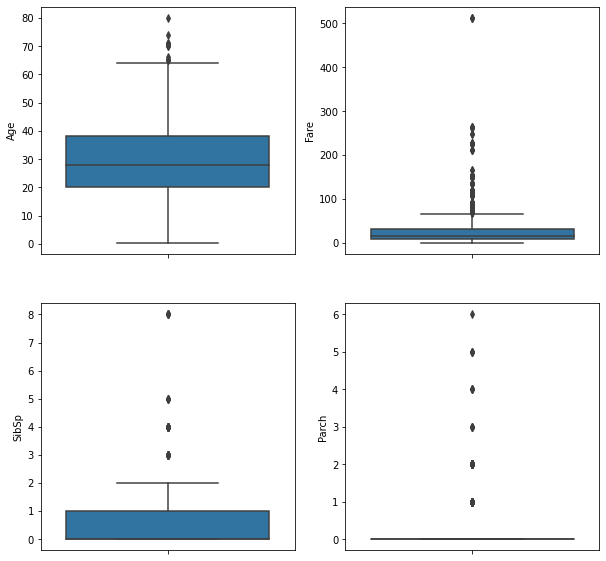

In [63]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.boxplot(data=titanic_dataset, y="Age", ax=axs[0][0])
sns.boxplot(data=titanic_dataset, y="Fare", ax=axs[0][1])
sns.boxplot(data=titanic_dataset, y="SibSp", ax=axs[1][0])
sns.boxplot(data=titanic_dataset, y="Parch", ax=axs[1][1])

As análise feitas anteriormente ficam mais evidentes com a apresentação dos boxsplot. Os `outliers` aparecem em todos os atributos. Na etapa de transformação dos dados, vamos analisar o que fazer com esses valores. 

**Análise do Histograma**

Para finalizar a análise dos atributos univariados, vamos olhar para o histograma de alguns atributos.

<AxesSubplot:xlabel='Parch', ylabel='Count'>

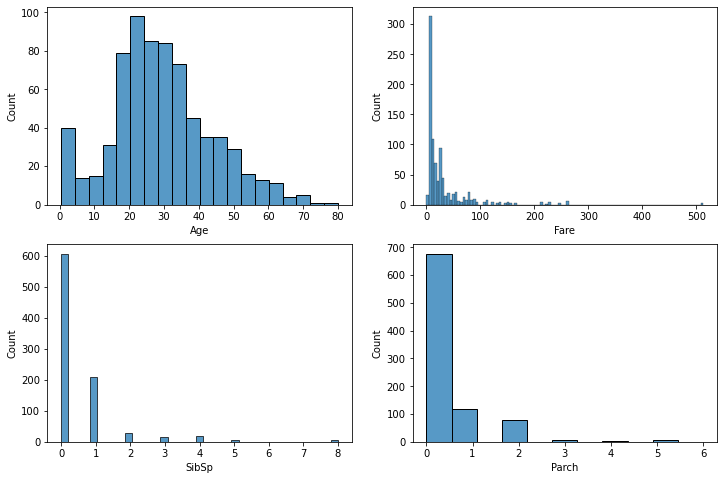

In [71]:
fig, axs  = plt.subplots(ncols=2,nrows=2,figsize=(12,8))
sns.histplot(titanic_dataset['Age'], ax=axs[0][0])
sns.histplot(titanic_dataset['Fare'], ax=axs[0][1])
sns.histplot(titanic_dataset['SibSp'], ax=axs[1][0])
sns.histplot(titanic_dataset['Parch'], ax=axs[1][1])

Os histogramas mostram que as informações de idade estão muito mais bem distribuída do que os outros atributos analisados. Em relação, a o preço da passagem, podemos notar que os dados se concentram muito mais em valores baixos, tendo algumas poucas instâncias com valores elevados. Isso já foi observado em outras análises e o histograma confirma isso. O mesmo acontece com as informações de parentes, que já tínhamos observados que a grande maioria não tinha parentes no Titanic. 

Essa mesma informação pode ser confirmada a partir dos valores de `obliquidade` a seguir:

In [73]:
data_temp.skew()

Age      0.389108
SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64

No caso da obliquidade, valores próximos de zero indicam uma distribuição mais próxima da normal. Valores maiores que 0, indicam uma distribuição mais a esquerda e valores menores que zero, uma distribuição mais a direita. 

Para finalizar a análise atributos quantitativos do Titanic, vamos explorar a correlação entre os dados quantitativos. 

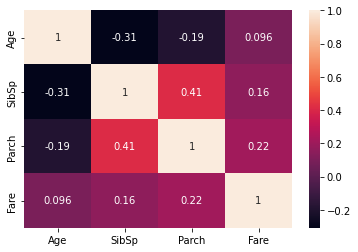

In [71]:
titanic_corr = titanic_dataset[['Age','SibSp','Parch', 'Fare']].corr()
sns.heatmap(titanic_corr, xticklabels=titanic_corr.columns, yticklabels=titanic_corr.columns, annot=True)

Podemos enxergar por meio do Scatter Plot também.

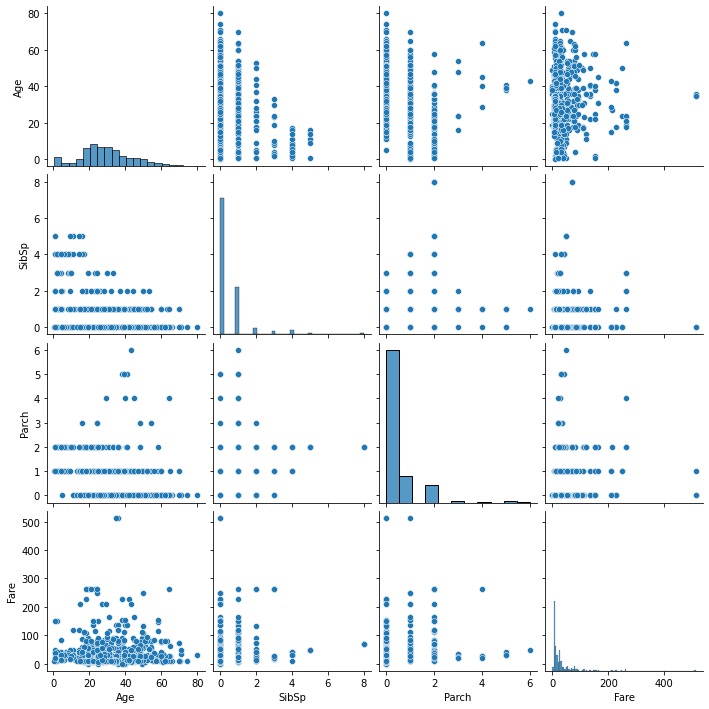

In [72]:
sns.pairplot(titanic_dataset[['Age','SibSp','Parch', 'Fare']], kind="scatter",markers=["o"], palette="Set2",diag_kind="hist")
plt.show()

É fácil perceber que não existem muitas correlações lineares entre os atributos numéricos. A maioria das correlações são próximas de zero com algumas tendências positivas ou negativas. No entanto, esses atribuitos serão melhor relacionados com outros atributos mais a frente. 

### Análise Qualitativa

Veja que podemos extrair muitas informações apenas com medidas estatísticas a respeito dos dados quantitativos. De forma semelhante, podemos analisar os dados qualitativos. Para visualizar a distribuição de valores, vamos utilizar gráficos de barra. Ao longo do curso, serão exploradas outras formas de visualização dos dados.

Vamos trabalhar com os seguintes dados qualitativos: `Survived`, `Pclass`, `Sex` e `Embarked`.  

Primeiro vamos ver se eles estão completos. Ou seja, se todas as instâncias têm as informações para todos esses atributos. 

In [69]:
titanic_dataset[['Survived', 'Pclass', 'Sex', 'Embarked']].count()

Survived    891
Pclass      891
Sex         891
Embarked    889
dtype: int64

Observe que apenas duas instâncias não possuem a infomação do portão de embarque. Os demais atributos estão presentes em todas as instâncias.

Um jeito simples de entender os dados dos atributos qualitativos é plotar um gráfico de barras para cada um dos atributos para entender como os dados estão distribuídos dentro de cada um dos atributos. 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

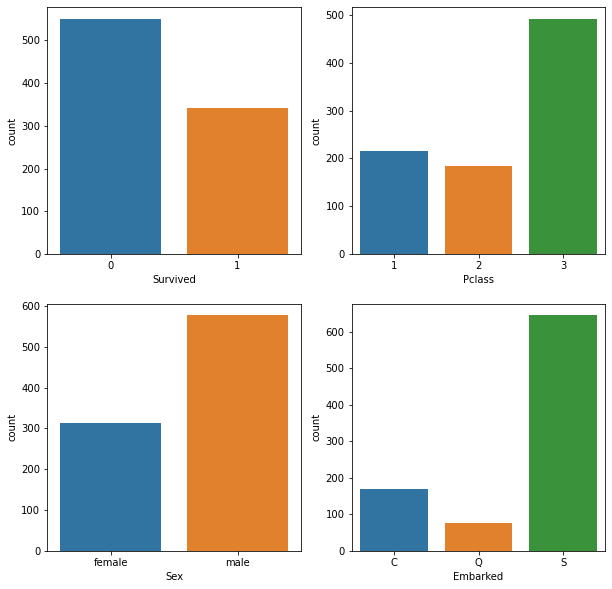

In [76]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.countplot(x="Survived",data=titanic_dataset,ax=axs[0][0])
sns.countplot(x="Pclass",data=titanic_dataset,ax=axs[0][1])
sns.countplot(x="Sex",data=titanic_dataset,ax=axs[1][0])
sns.countplot(x="Embarked",data=titanic_dataset,ax=axs[1][1])

**O que podemos analisar desses gráficos?**

1. É fácil ver que existem mais pessoas que não sobreviveram ao Titanic. Se essa for nossa variável de classificação em um modelo de Machine Learning, isso deve ser analisado para saber se esse desbalanceamento terá implicâncias no modelo de classificação. Isso será trabalhado mais à frente no curso.

2. As outras classes a gente observa que existe um predominância de alguns valores. Tem mais pessoas da terceira classe, mais homens e mais pessoas que embarcaram no portão S. 

A moda pode ser uma métrica que ajude a ver essa informação nos dados qualitativos. 

In [77]:
titanic_dataset[['Survived', 'Pclass', 'Sex', 'Embarked']].mode()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S


Na tabela acima, para cada atributo é mostrado o que é mais frequente. 

Vamos olhar melhor esses dados qualitativos fazendo algumas correlações entre os atributos. Uma forma simples de ver essa correlações é por meio de gráfico de barra, onde conseguimos relacionar as duas variáveis qualitativas. Um pouco de como relacionar estes dois tipos de variáveis pode ser visto [neste vídeo](https://www.youtube.com/watch?v=7zzQAPuATK8)

**Sobrevivente x Classe** 

<AxesSubplot:xlabel='Pclass'>

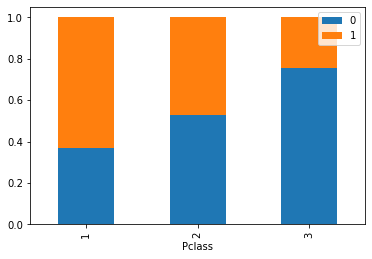

In [78]:
props = titanic_dataset.groupby("Pclass")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

**O que esse gráfico nos conta?**

É fácil perceber que os passageiros que estavam na terceira classe foram os que tiveram maior número de vítimas. Uma justificativa para isso pode ter sido os privilégios dos passageiros das classes superiores. No entanto, qualquer análise mais profunda de causalidade deve ser analisada com certa ponderação e com outras fontes de informações. 

**Sobrevivente x Sexo**

<AxesSubplot:xlabel='Sex'>

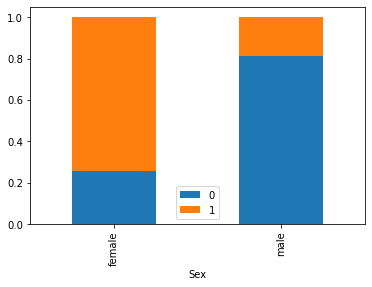

In [79]:
props = titanic_dataset.groupby("Sex")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

**O que esse gráfico nos conta?**

De fato, as mulheres tinham preferência sobre o uso dos botes salva-vidas. Logo, o número de sobreviventes mulheres é maior que os de homem. 

**Sobrevivente x Ter Parentes**

Outra coisa que pode ser relacionada é o fato do passageiro ter parentes ou não. É sabido que passageiros com crianças tinham preferência. Para fazer essa analise, vamos criar um campo qualitativo que indica se o passageiro tinha algum tipo de parente. 

In [80]:
cond_ = (titanic_dataset['SibSp'] + titanic_dataset['Parch']) > 0
titanic_dataset['HasRelatives'] = cond_
titanic_dataset['Survived'] = titanic_dataset['Survived'].astype("bool")

<AxesSubplot:xlabel='HasRelatives'>

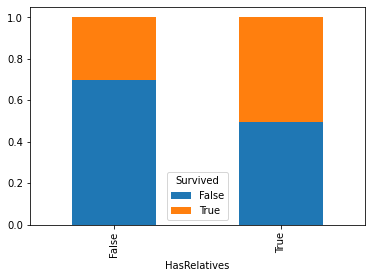

In [81]:
props = titanic_dataset.groupby("HasRelatives")['Survived'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')

**O que esse gráfico nos conta?**

De fato, a porcentagem de sobreviventes é maior naquele grupo que tinha parentes. Talvez uma análise interessante de se fazer é relacionar esses dois fatores com o fato dos passageiros serem da primeira, segunda ou terceira classe. 

**Sobrevivente x Ter Parentes x Classe**

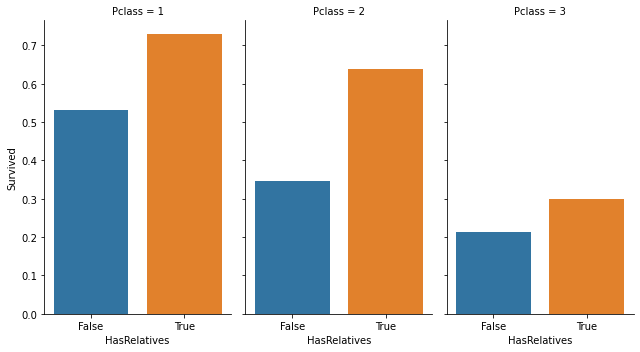

In [84]:
g = sns.catplot(x="HasRelatives", y="Survived", col="Pclass",
                data=titanic_dataset,
                kind="bar", ci=None, aspect=.6)

Veja que mesmo tendo parentes, a taxa de sobreviventes na terceira classe variou pouco (de 20% para 30%). Já na primeira classe, esse valor passou de 50% para um pouco mais de 70%.

### Análise Qualitativa x Quantitativa

Outra relação interessantes para extrair deste conjunto de dados é a relação Idade/Sobrevivente. Neste caso, estamos relacionando um atributo quantitativo com um atributo qualitativo. As métricas e modelos utilizados até então foram de atributos do mesmo tipo. Uma explicação dessa abordagem pode ser encontrada [neste vídeo](https://www.youtube.com/watch?v=qMVALuutgU0).

**Sobrevivente x Idade**

A relação de idade e sobrevivente pode ser analisada a partir de um boxplot que relacione a variável qualitativa com a quantitativa.


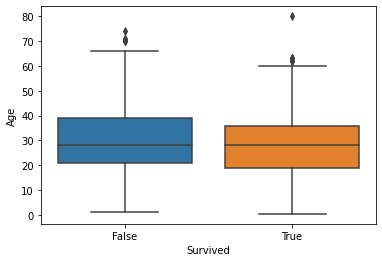

In [85]:
ax = sns.boxplot(x="Survived", y="Age", data=titanic_dataset)

**O que podemos analisar desse gráfico?**

Obseve no gráfico a seguir que a faixa etária de pessoas que sobreviveram e as que não sobreviveram são bem parecidas. A mediana em ambos os casos é quase a mesma. Sendo assim, não existe uma relação entre a idade e o fato de ter sobrevivido. 

**Classe x Passagem**

Vamos olhar a relação também a relação entre a classe e o valor pago pela passagem. 

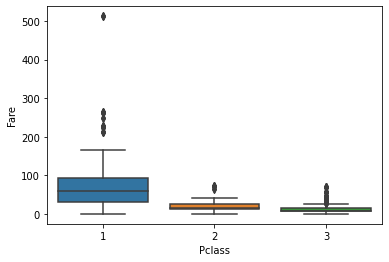

In [103]:
ax = sns.boxplot(x="Pclass", y="Fare", data=titanic_dataset)

**O que podemos analisar desse gráfico?**

Esse gráfico ajuda a ver que o valor alto pago pela passagem está relacionado com passageiros da primeira classe. Isso pode mostrar que de fato o valor faz sentido e corresponde a alguma cabine que tem um valor alto.

Com isso concluímos nossa análise da base de dados Titanic. 

![img_final](https://media.giphy.com/media/MDh6t9yZMhUOEGrioV/giphy.gif)

Veja que as métricas e gráficos estudados permitem fazer diferentes análises e conhecer melhor os dados que estamos trabalhando. Isso é fundamental para o processo de transformação dos dados e, consequentemente, de treinamento dos modelos de Machine Lerning.

## Sugestão de Análise: Popularidade de Notícias

Agora é sua vez :) Faça a análise da base a seguir.

Um empresa coletou uma série de informações sobre artigos publicados em seu site. Para cada artigo foi coletada uma série de métricas interessantes. Analise as métricas a seguir e construa visualizações que facilitem  análise. Como a base possui muitos atributos, escolha um conjunto de atributos que, no seu ponto de vista, seria importante para analisar. 

Informações originais sobre o dataset estão disponíveis no paper: 

> K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal. Disponível em: https://link.springer.com/chapter/10.1007/978-3-319-23485-4_53. 

O dataset pode ser baixado no site: https://archive.ics.uci.edu/ml/datasets/online+news+popularity ou acessado na pasta `datasets` deste repositório. 

Para o uso dessa atividade, vamos fazer algumas modificações na base. Como não é o escopo desse material, apenas aplique as transformações a partir da função `transform_data`. Detalhes sobre essas transformações serão dadas nas próximas aulas. Aqui o foco vai ser a análise dos dados. 


### Tarefa

Você como analista de dados teve acesso a essas informações e foi contratado para fazer uma análise desses dados com o objetivo de responder a seguinte pergunta: **Quais fatores estão relacionados com um maior ou menor compartilhamento das notícias?**. Com base nessa pergunta, faça o que se pede:

1. Classificar cada um dos atributos em relação à tipo e escala vistos em sala de aula.
2. Calcular as métricas de localidade, distribuição e correlação vistas em sala de aula. Observe o tipo de atributo para cálculo da métrica correta.
3. Faça uma análise dos resultados obtidos com o intuito de responde a pergunta levantada.

Vamos começar. Vamos carregar a base a partir do arquivo `OnlineNewsPopularity.csv`. Ele está disponível na pasta `dataset` do repositório ou diretamente no link: https://archive.ics.uci.edu/ml/datasets/online+news+popularity e aplicar as funções de transformação da base.

A base possui as seguintes colunas, após a tranformação: 

| Atributo                   | Descrição                                                                               |
|----------------------------|-----------------------------------------------------------------------------------------|
| timedelta                  | Days between the article publication and the dataset acquisition                        |
| n_tokens_title             | Number of words in the title                                                            |
| n_tokens_content           | Number of words in the content                                                          |
| n_unique_tokens            | Rate of unique words in the content                                                     |
| num_hrefs                  | Number of links                                                                         |
| num_self_hrefs             | Number of links to other articles published by Mashable                                 |
| num_imgs                   | Number of images                                                                        |
| num_videos                 | Number of videos                                                                        |
| num_keywords               | Number of keywords in the metadata                                                      |
| channel                    | Channel of publication: Lifestyle, Entertainment, Business, Social Media, Tech, World.  |
| weekday                    | Weekday of publication: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday. |
| global_subjectivity        | Text subjectivity                                                                       |
| global_sentiment_polarity  | Text sentiment polarity                                                                 |
| global_rate_positive_words | Rate of positive words in the content                                                   |
| global_rate_negative_words | Rate of negative words in the content                                                   |
| title_subjectivity         | Title subjectivity                                                                      |
| title_sentiment_polarity   | Title polarity                                                                          |
| shares                     | Number of shares (target)                                                               |

In [95]:
data_popularity = pd.read_csv("../datasets/OnlineNewsPopularity.csv")
data_popularity.columns = [column.strip() for column in data_popularity.columns] # corrige o problema de ter espaço nos nomes das colunas 
data_popularity = transform_data(data_popularity)
data_popularity.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,channel,weekday,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,731.0,8.0,960.0,0.418163,21.0,20.0,20.0,0.0,10.0,lifestyle,monday,0.514480,0.268303,0.080208,0.016667,0.000000,0.000000,556
1,731.0,10.0,187.0,0.666667,7.0,0.0,1.0,0.0,7.0,lifestyle,monday,0.477165,0.150000,0.026738,0.010695,0.000000,0.000000,1900
2,731.0,11.0,103.0,0.689320,3.0,1.0,1.0,0.0,6.0,lifestyle,monday,0.423611,0.118056,0.029126,0.009709,0.857143,-0.714286,5700
3,731.0,10.0,243.0,0.619247,1.0,1.0,0.0,0.0,10.0,lifestyle,monday,0.517984,0.155603,0.049383,0.020576,0.000000,0.000000,462
4,731.0,8.0,204.0,0.586207,7.0,2.0,1.0,0.0,8.0,lifestyle,monday,0.651940,0.316986,0.073529,0.004902,0.000000,0.000000,3600


## É isso

Agora é com vocês. Façam a análise de acordo com o que foi pedido. Com isso encerramos nossa aula de análise de dados. Outros tipos de análise podem aparecer ao longo do curso. 

![force](https://media.giphy.com/media/3o85xAojNshmzlySyc/giphy.gif?cid=ecf05e47x07q84ywa19aus9n1j1owve0mad420ffmpo6vjha&rid=giphy.gif&ct=g)

**Boa atividade e Divirtam-se ;)**

## Funções de Suporte

As funções a seguir são apenas de suporte para o conteúdo passado. Não precisa modifica-las.

In [94]:
def transform_data(dataset):

    # Colunas com informações de Channel 

    melt_columns_channel = [
        'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed',
        'data_channel_is_tech', 'data_channel_is_world'
    ]

    # Demais colunas do dataset

    all_columns_channel = [column for column in dataset.columns if column not in melt_columns_channel]

    # Transformação da base de dados 

    data_final = pd.melt(dataset, id_vars=all_columns_channel, value_vars=melt_columns_channel, var_name='channel', value_name='channel_value')
    data_final = data_final[data_final['channel_value'] != 0]
    data_final['channel'] =data_final['channel'].str.split("_").str[-1]
    data_final.drop(columns=['channel_value'], inplace=True)
    data_final.reset_index(inplace=True)
    
    
    # Colunas com informações do weekday 
    melt_columns_weekday = ['weekday_is_monday', 'weekday_is_tuesday', 
        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'
    ]

    # Demais colunas do dataset
    all_columns_weekday = [column for column in data_final.columns if column not in melt_columns_weekday]


    data_final = pd.melt(data_final, id_vars=all_columns_weekday, value_vars=melt_columns_weekday, var_name='weekday', value_name='weekday_value')
    data_final = data_final[data_final['weekday_value'] != 0]
    data_final['weekday'] =data_final['weekday'].str.split("_").str[-1]
    data_final.drop(columns=['weekday_value'], inplace=True)
    data_final.reset_index(inplace=True)

    # Selecionando colunas de interesse 

    data_final = data_final[['timedelta', 'n_tokens_title',
       'n_tokens_content', 'n_unique_tokens','num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'num_keywords', 'channel', 'weekday', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares']]
    

    return data_final



